# Introduction Data Science
# Assignment 4: Dimensionality reduction and unsupervised learning

### In this assignment you will experiment with the most often used techniques for dimensionality reduction and unsupervised learning: PCA and k-means.

### Learning goals:

* PCA
    * Understand how to use sklearn to apply PCA to a dataset
    * Experiment with different datasets to understand the output of PCA and how it can be useful
    * Learn how to choose the number of principal componets

* k-means
    * Understand how to use sklearn to apply k-means to a dataset  
    * Learn how to choose an appropriate number of clusters


### Import required packages

In [1]:
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


from sklearn import datasets

import matplotlib
from mpl_toolkits.mplot3d import Axes3D

import matplotlib.pyplot as plt
%matplotlib inline  



## 1. PCA
Before you begin, take a look at the sklearn website and check which input parameters you can use when performing a PCA and which output you can expect:

http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

### 1.1 Starting easy:
Here the goal is to perform a simple PCA and get acquainted with the input and putput of such a model. The steps to be followed are:

1. Load dataset
2. Define PCA object (start by using n_components = 3)
3. Fit PCA to data
3. Print the variance explained by each component
4. Project the original feature matrix onto the PCA coordinates
5. Visualize the results

Dataset shape: (150, 4)
Percentage of variance explained per component:[ 0.92461621  0.05301557  0.01718514]


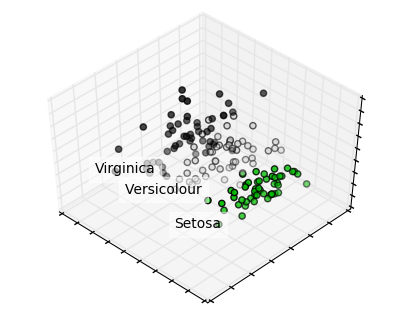

In [2]:
# 1. Load dataset
iris = datasets.load_iris()
X_iris = iris.data
y_iris = iris.target
print('Dataset shape: {}'.format(X_iris.shape))

# df = pd.DataFrame(np.hstack([X,y.reshape(-1,1)]))
# df.columns = ['sepal_length', 'sepal_width', 'petal_length','petal_width','target']
# df.head(3)

# 2. Choose number of components:
pca_components_num = 3

# 3. Define pca:
pca = PCA(n_components=pca_components_num,random_state=42)

# 4. Fit to data:
pca.fit(X_iris)

# 5. Print the variance explained:
print('Percentage of variance explained per component:{}'.format(pca.explained_variance_ratio_))

# 6. Project the original feature matrix onto the PCA coordinates:
X_iris_pca = pca.transform(X_iris)

# 7. Visualize the result:
fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X_iris_pca[y_iris == label, 0].mean(),
              X_iris_pca[y_iris == label, 1].mean() + 1.5,
              X_iris_pca[y_iris == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y_iris = np.choose(y_iris, [1, 2, 0]).astype(np.float)
ax.scatter(X_iris_pca[:, 0], X_iris_pca[:, 1], X_iris_pca[:, 2], c=y_iris, cmap=plt.cm.spectral)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()


Which conclusions can you draw from this exercise?
Even though the iris dataset is quite simple (4 features!), you can already see from the result of PCA that one component can explain a big part of the variance (92%). And the plot also shows that the variance along this component is strongly correlated with the label.
Not so impressive for iris, maybe. But think of a scenario in which your dataset does not have 4 features, but 400 and you can combine a great deal of the variance in a couple of components. That can decrease the complexity of you data greatly and make it easier for a model to find a good fit, since the feature space is much smaller using the principal components than the original features.

### 1.2 Extra: choosing the number of principal components
An important part of performing a PCA is choosing how many components should be carried forward into the next steps of your pipeline. To experiemnt with that, we will now work with the dataset "digits", which has 64 features. The idea is to perform a PCA with many components and use the amount of variance explained by each of them in order to choose how many should be kept.

You should perform the following steps:
1. Load the dataset
2. Define a PCA object, but without specifying the number of components (check sklearn's wesite to see how many components will be used).
3. Make 2 plots:
    * plot 1: y = variance explained by each component vs x = each component (1,2,3...)
    * plot 2: y = cumulative variance explained (sum for all components) vs x = total number 4. Use the curves to reflect about how many components you would keep for such a dataset.


Dataset shape: (1797, 64)


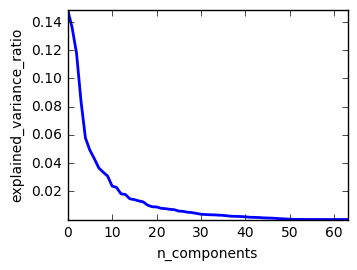

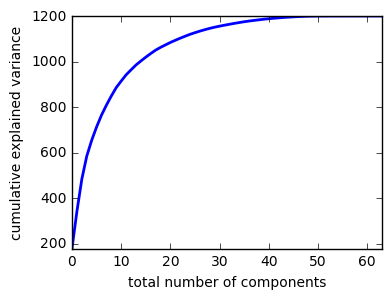

In [3]:
# 1. Load dataset
digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target
print('Dataset shape: {}'.format(X_digits.shape))


# 2. Define PCA, without specifying the number of components. 
# When you do that, n_components == min(n_samples, n_features)

pca = PCA()

# 3. Fit to data:
pca.fit(X_digits)


# 4. Plot:
# x = compontent number [1,...,n_components] vs y = variance explained by each component

plt.figure(1, figsize=(4, 3))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio')
plt.show()

# 5. Plot the cumulative explained variance:
# x = total of number of components (e.g. 3) vs 
# y = variance explained by all those components (var_x1 + var_x2 + var_x3)
plt.figure(1, figsize=(4, 3))
plt.clf()
plt.plot(pca.explained_variance_.cumsum(), linewidth=2)
plt.axis('tight')
plt.xlabel('total number of components')
plt.ylabel('cumulative explained variance')
plt.show()

## 2. K-means
K-means is an unsupervised technique, which means that it does not use any ground truth information (true labels).
For learning purposes, we will keep on working with the iris dataset, for which we do know the ground truth. We will first ignore the class label, perform k-means and later check if the clusters found have any relationship with the classes.

### 2.1 Starting easy!
In this session we will:

1. Perform k-means with n_clusters = 3 (because we know there are 3 classes!)
2. Get the labels attributed to each sample
3. Make a 3D plot where: x,y,z are 3 of the 4 features of the dataset and the color of each point (=sample) corresponds to the label given by k-means
4. Make the same plot from (3), but now color the points accoriding to the true label. Do you see a relationship?


Inertia: 78.9408414261


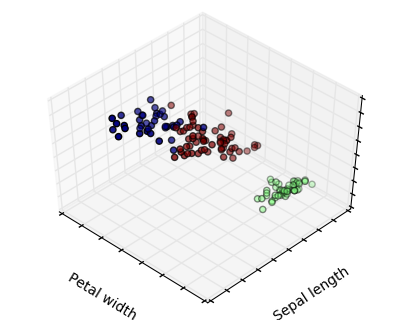

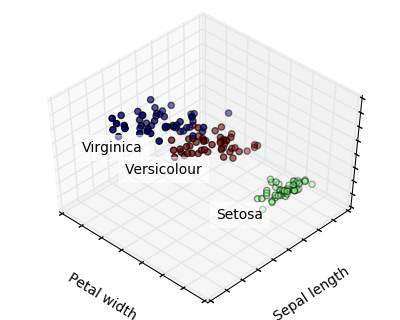

In [21]:
# Generate a K-means object with 3 clusters:
estimator = KMeans(n_clusters=3)

# Fit to data:
estimator.fit(X_iris)

# Print the inertia:
print('Inertia: {}'.format(estimator.inertia_))

# Get labels attributed to each sample:
labels = estimator.labels_

# Plot a 3D graph where x,y,z are 3 of the 4 features of iris and the color of 
# each point/sample represents the label given to it by k-means

fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
plt.cla()

ax.scatter(X_iris[:, 3], X_iris[:, 0], X_iris[:, 2], c=labels.astype(np.float))

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')

# Plot the same graph above, but where the color of each point/sample represents 
# the true class label

fig = plt.figure(2, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()

for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(X_iris[y_iris == label, 3].mean(),
              X_iris[y_iris == label, 0].mean() + 1.5,
              X_iris[y_iris == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
    
# Reorder the labels to have colors matching the cluster results
y_iris_reorder = np.choose(y_iris, [1, 2, 0]).astype(np.float)
ax.scatter(X_iris[:, 3], X_iris[:, 0], X_iris[:, 2], c=y_iris_reorder)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
plt.show()

### 2.2 Bonus 1: 
In the previous session we could specify the number of clusters because we knw how many clusters to expect. In a real problem, how would you do that?

In this session we will generate several k-means models with different number of clusters and compute the inertia or within-cluster sum-of-squares (check session 2.2 for more details: http://scikit-learn.org/stable/modules/clustering.html#k-means)

We will perform the following steps:
1. Make several values for the number of clusters (e.g. from 1 to 8)
2. For each model, compute the inertia
3. Make an elbow plot (inertia vs number of clusters). how many clsuters would you choose if you didn't have any previous knowledge?


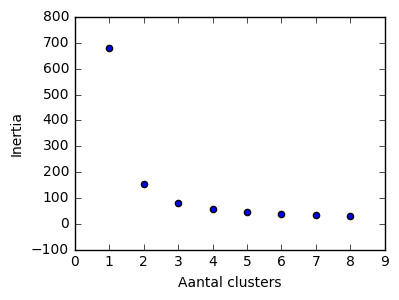

In [32]:
estimators = {'k_means_iris_1': KMeans(n_clusters=1),
              'k_means_iris_2': KMeans(n_clusters=2),
              'k_means_iris_3': KMeans(n_clusters=3),
              'k_means_iris_4': KMeans(n_clusters=4),
              'k_means_iris_5': KMeans(n_clusters=5),
              'k_means_iris_6': KMeans(n_clusters=6),
              'k_means_iris_7': KMeans(n_clusters=7),
              'k_means_iris_8': KMeans(n_clusters=8)
             }

num_clusters = list()
inertia = list()
for name, est in estimators.items():
    est.fit(X_iris)
    inertia.append(est.inertia_)
    num_clusters.append(est.n_clusters)
    
fig = plt.figure(2, figsize=(4, 3))
plt.clf()
plt.scatter(num_clusters,inertia)
plt.xlabel('Aantal clusters')
plt.ylabel('Inertia')